## **Importing the libraries and overview of the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **Loading the Dataset**

In [2]:
# Loading the dataset
df = pd.read_csv('replica-telework_dc-11_02_22-trips_dataset.csv')

In [3]:
df.head()

,trip_duration_minutes,trip_distance_miles,trip_taker_wfh,trip_taker_individual_income,trip_taker_commute_mode,trip_taker_household_size,trip_taker_household_income
0,689,257.1,in_person,65659,private_auto,2,131318
1,670,249.9,in_person,31638,private_auto,5,441879
2,660,246.1,in_person,71685,private_auto,2,152448
3,648,241.9,in_person,71685,private_auto,2,152448
4,660,246.2,in_person,27909,carpool,12,206531


### **Checking the info of the dataset**

In [4]:
# Let us see the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10628212 entries, 0 to 10628211
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   trip_duration_minutes         int64  
 1   trip_distance_miles           float64
 2   trip_taker_wfh                object 
 3   trip_taker_individual_income  int64  
 4   trip_taker_commute_mode       object 
 5   trip_taker_household_size     int64  
 6   trip_taker_household_income   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 567.6+ MB


**Let's check the unique values in each column** 

In [5]:
# Checking unique values in each column
df.nunique()

trip_duration_minutes            1439
trip_distance_miles              9663
trip_taker_wfh                      2
trip_taker_individual_income    16635
trip_taker_commute_mode             7
trip_taker_household_size          17
trip_taker_household_income     23374
dtype: int64

In [6]:
# Dropping the columns 
df=df.drop(['trip_taker_commute_mode','trip_taker_household_income'],axis=1)

**Let's check the relationship between attrition and Numerical variables**

**Now we have explored our data. Let's build the model**

## **Model Building - Approach**

1. Data preparation.
2. Partition the data into a train and test set.
3. Build a model on the train data.
4. Tune the model if required.
5. Test the data on the test set.

**Separating the independent variables (X) and the dependent variable (Y)**

In [7]:
# Separating target variable and other variables

Y= df.trip_taker_wfh
X= df.drop(columns = ['trip_taker_wfh'])

In [8]:
# check the distribution
Y.value_counts()/df.shape[0]

in_person    0.741005
remote       0.258995
Name: trip_taker_wfh, dtype: float64

**Splitting the data into 70% train and 30% test set**

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [9]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [10]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# Transform on test data
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [11]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not remote', 'remote'], yticklabels=['Not remote', 'remote'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Building the model**

We will be building 4 different models:

- **Logistic Regression**
- **Support Vector Machine(SVM)**
- **Decision Tree**
- **Random Forest**


### **Logistic Regression Model**

- Logistic Regression is a supervised learning algorithm which is used for **binary classification problems** i.e. where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event y, given some features x as:

                                          P(y)=1/exp(1 + exp(-x))

In [12]:
log_reg = LogisticRegression(class_weight = 'balanced')
log_reg.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced')

              precision    recall  f1-score   support

   in_person       0.78      0.64      0.71   5512890
      remote       0.32      0.49      0.39   1926858

    accuracy                           0.60   7439748
   macro avg       0.55      0.57      0.55   7439748
weighted avg       0.66      0.60      0.62   7439748



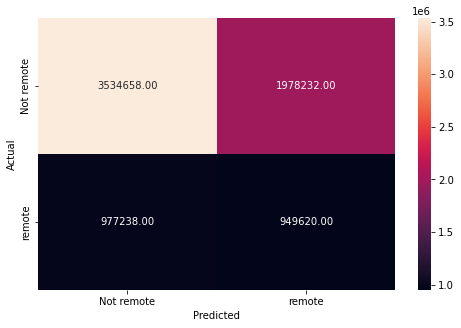

In [13]:
y_pred_train = log_reg.predict(X_train_scaled)

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

   in_person       0.78      0.64      0.71   2362668
      remote       0.32      0.49      0.39    825796

    accuracy                           0.60   3188464
   macro avg       0.55      0.57      0.55   3188464
weighted avg       0.66      0.60      0.62   3188464



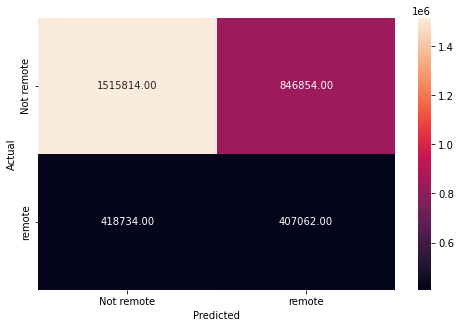

In [14]:
# Checking the performance on the test dataset
y_pred_test = log_reg.predict(X_test_scaled)

metrics_score(y_test, y_pred_test)

In [15]:
# Printing the coefficients of logistic regression

log_reg.coef_


array([[-0.03895089,  0.07090875,  0.22760517, -0.09335642]])

In [20]:
# Printing the coefficients of logistic regression
cols=X.columns

coef_lg=log_reg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by = 0,ascending = False)

,0
trip_taker_individual_income,0.227605
trip_distance_miles,0.070909
trip_duration_minutes,-0.038951
trip_taker_household_size,-0.093356


In [21]:
log_reg.classes_

array(['in_person', 'remote'], dtype=object)

In [22]:
log_reg.class_weight

'balanced'

In [25]:
log_reg.intercept_

array([-0.01242646])

In [30]:
# Predict_proba gives the probability of each observation belonging to each class
y_scores_log_reg=log_reg.predict_proba(X_train_scaled)

precisions_log_reg, recalls_log_reg, thresholds_log_reg = precision_recall_curve(y_train, y_scores_log_reg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_log_reg, precisions_log_reg[:-1], 'b--', label='precision')
plt.plot(thresholds_log_reg, recalls_log_reg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

ValueError: y_true takes value in {'in_person', 'remote'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [16]:
#Another Try 

In [17]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_train_scaled,y_train)


              precision    recall  f1-score   support

   in_person       0.74      0.99      0.85   5512890
      remote       0.32      0.01      0.02   1926858

    accuracy                           0.74   7439748
   macro avg       0.53      0.50      0.43   7439748
weighted avg       0.63      0.74      0.63   7439748



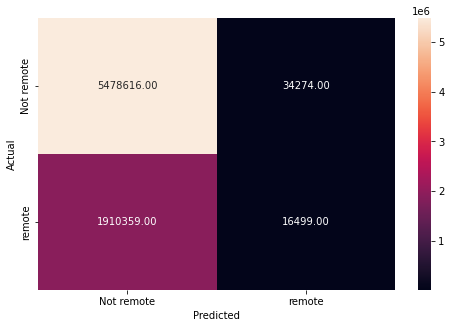

In [18]:
y_pred_train = clf.predict(X_train_scaled)

metrics_score(y_train, y_pred_train)

In [19]:
clf.coef_


array([[-0.03498848,  0.06309624,  0.19600121, -0.09346962]])